In [437]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eda-project-analyze-us-citizens/adult_eda.csv


Steps

In [438]:
'''
EDA: Explotatory Data Analysis - Understanding what is there inside the data

Iteration-1:

1. Read the data
2. Shape of data
3. Information about the data
4. Finding duplicate rows, drop duplicate rows
5. Find the basic statistics of continuous data columns  
6. Rename the columns(optional)
7. Find the missing values(percentage optional)
8. Finding basic statistics of categorical columns    
9. Basic count analysis on categorical columns

(we have 2 columns categorical column and continuous column)

Iteration-02:
1. Univariate Analysis
2.   Target column univariate analysis
3.   Rest of the categorical columns
4. Numerical columns

Iteration-03:
1. Multivariate analysis

'''


'\nEDA: Explotatory Data Analysis - Understanding what is there inside the data\n\nIteration-1:\n\n1. Read the data\n2. Shape of data\n3. Information about the data\n4. Finding duplicate rows, drop duplicate rows\n5. Find the basic statistics of continuous data columns  \n6. Rename the columns(optional)\n7. Find the missing values(percentage optional)\n8. Finding basic statistics of categorical columns    \n9. Basic count analysis on categorical columns\n\n(we have 2 columns categorical column and continuous column)\n\nIteration-02:\n1. Univariate Analysis\n2.   Target column univariate analysis\n3.   Rest of the categorical columns\n4. Numerical columns\n\nIteration-03:\n1. Multivariate analysis\n\n'

In [439]:
'''
Kinds of plot
Univariate: 
1. Univariate analysis - Categorical variable - Count plot - percentages - pie chart 
  (workclass,ocupation,education,marital status,relationship,race,sex,salary,native country,education_num)
  
2. Univariate analysis- Numerical variable - boxplot, histogram with kde
  (age,fnlwgt,capital gain,capital loss,hours per week)
  
3. Multivariate analysis- Categorical,Numerical- boxplot,histplot,kdeplot
4. Multivariate analysis- Categorical,Categorical
5. Multivariate analysis- Numerical,Numerical
'''

'\nKinds of plot\nUnivariate: \n1. Univariate analysis - Categorical variable - Count plot - percentages - pie chart \n  (workclass,ocupation,education,marital status,relationship,race,sex,salary,native country,education_num)\n  \n2. Univariate analysis- Numerical variable - boxplot, histogram with kde\n  (age,fnlwgt,capital gain,capital loss,hours per week)\n  \n3. Multivariate analysis- Categorical,Numerical- boxplot,histplot,kdeplot\n4. Multivariate analysis- Categorical,Categorical\n5. Multivariate analysis- Numerical,Numerical\n'

In [440]:
'''
1.Try to understand what the data looks like
  Check the head, shape, data-types of the features.
  Check if there are some dublicate rows or not. If there are, then drop them.
  Check the statistical values of features.
  If needed, rename the columns' names for easy use.
  Basically check the missing values.
'''

"\n1.Try to understand what the data looks like\n  Check the head, shape, data-types of the features.\n  Check if there are some dublicate rows or not. If there are, then drop them.\n  Check the statistical values of features.\n  If needed, rename the columns' names for easy use.\n  Basically check the missing values.\n"

In [441]:
import pandas as pd

In [442]:
df=pd.read_csv('/kaggle/input/eda-project-analyze-us-citizens/adult_eda.csv')

In [443]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [444]:
df.shape

(32561, 15)

In [445]:
df.info()   #object datatype is nothing but string datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [446]:
#finding duplicate rows
df.duplicated().value_counts()

False    32537
True        24
Name: count, dtype: int64

In [447]:
# drop duplicate rows
df=df.drop_duplicates()
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.0,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


In [448]:
#finding columns
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [449]:
#Rename the columns -- replacing - with _
df.columns=df.columns.str.replace("-","_")
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [450]:
df.describe()    # shows only numerical values and doesnot show string values  because mean median sd.... will be possible only for numerical values

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,31735.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.084008,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.575060,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [451]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education_num      802
marital_status       0
occupation           0
relationship      5064
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
salary               0
dtype: int64

In [452]:
#percentages
df.isnull().sum()/len(df)*100    # for being more accurate 

age                0.000000
workclass          0.000000
fnlwgt             0.000000
education          0.000000
education_num      2.464886
marital_status     0.000000
occupation         0.000000
relationship      15.563820
race               0.000000
sex                0.000000
capital_gain       0.000000
capital_loss       0.000000
hours_per_week     0.000000
native_country     0.000000
salary             0.000000
dtype: float64

In [453]:
'''
2.Look at the value counts of columns that have object datatype and detect strange values apart from the NaN Values
'''

'\n2.Look at the value counts of columns that have object datatype and detect strange values apart from the NaN Values\n'

In [454]:
df.describe(include="object")
#'''
#Out of 32537 datapoints 22673 datapoints have work class as private
#Unique how many unique words are there in workclass
#'''

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,salary
count,32537,32537,32537,32537,27473,32537,32537,32537,32537
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27795,21775,29153,24698


In [455]:
categorical_cols = df.loc[:, df.dtypes == object].columns
categorical_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'salary'],
      dtype='object')

In [456]:
# 
#categorical_cols=['workclass','education','marital_status','occupation','relationship','race','sex','native_country','salary']
for cat in categorical_cols:
    print(f'Columns Name: {cat}')
    print(df[cat].value_counts())
    print('================================')

Columns Name: workclass
workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
Columns Name: education
education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64
Columns Name: marital_status
marital_status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
Columns

In [457]:
print((df.astype(str)=='?').sum()) 

## any() - gives bool value
## sum() - gives no.of values present

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
salary               0
dtype: int64


In [458]:
(df.astype(str)=='?').any().value_counts()

False    12
True      3
Name: count, dtype: int64

In [459]:
print((df.astype(str) == '?').any())

age               False
workclass          True
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation         True
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country     True
salary            False
dtype: bool


In [460]:
#data=data.replace('?',pd.NA)
#data

In [461]:
#df.isnull().sum()

In [462]:
#df=data.dropna()
#df

In [463]:
#df.isnull().sum()

**Univariate**

Categorical, Numerical

In [464]:
'''
Examine all features (first target feature("salary"), then numeric ones, lastly categoric ones) separetly from different aspects according to target feature.

To do list for numeric features:
1. Check the boxplot to see extreme values
2. Check the histplot/kdeplot to see distribution of feature
3. Check the statistical values
4. Check the boxplot and histplot/kdeplot by "salary" levels
5. Check the statistical values by "salary" levels
6. Write down the conclusions you draw from your analysis

To do list for categoric features:

1. Find the features which contains similar values, examine the similarities and analyze them together
2. Check the count/percentage of person in each categories and visualize it with a suitable plot
3. If need, decrease the number of categories by combining similar categories
4. Check the count of person in each "salary" levels by categories and visualize it with a suitable plot
5. Check the percentage distribution of person in each "salary" levels by categories and visualize it with suitable plot
6. Check the count of person in each categories by "salary" levels and visualize it with a suitable plot
7. Check the percentage distribution of person in each categories by "salary" levels and visualize it with suitable plot
8. Write down the conclusions you draw from your analysis
'''

'\nExamine all features (first target feature("salary"), then numeric ones, lastly categoric ones) separetly from different aspects according to target feature.\n\nTo do list for numeric features:\n1. Check the boxplot to see extreme values\n2. Check the histplot/kdeplot to see distribution of feature\n3. Check the statistical values\n4. Check the boxplot and histplot/kdeplot by "salary" levels\n5. Check the statistical values by "salary" levels\n6. Write down the conclusions you draw from your analysis\n\nTo do list for categoric features:\n\n1. Find the features which contains similar values, examine the similarities and analyze them together\n2. Check the count/percentage of person in each categories and visualize it with a suitable plot\n3. If need, decrease the number of categories by combining similar categories\n4. Check the count of person in each "salary" levels by categories and visualize it with a suitable plot\n5. Check the percentage distribution of person in each "salary"

**Salary**

In [465]:
#salary
df['salary'].value_counts()    # categorical bcz it is countable

salary
<=50K    24698
>50K      7839
Name: count, dtype: int64

<Axes: xlabel='salary', ylabel='count'>

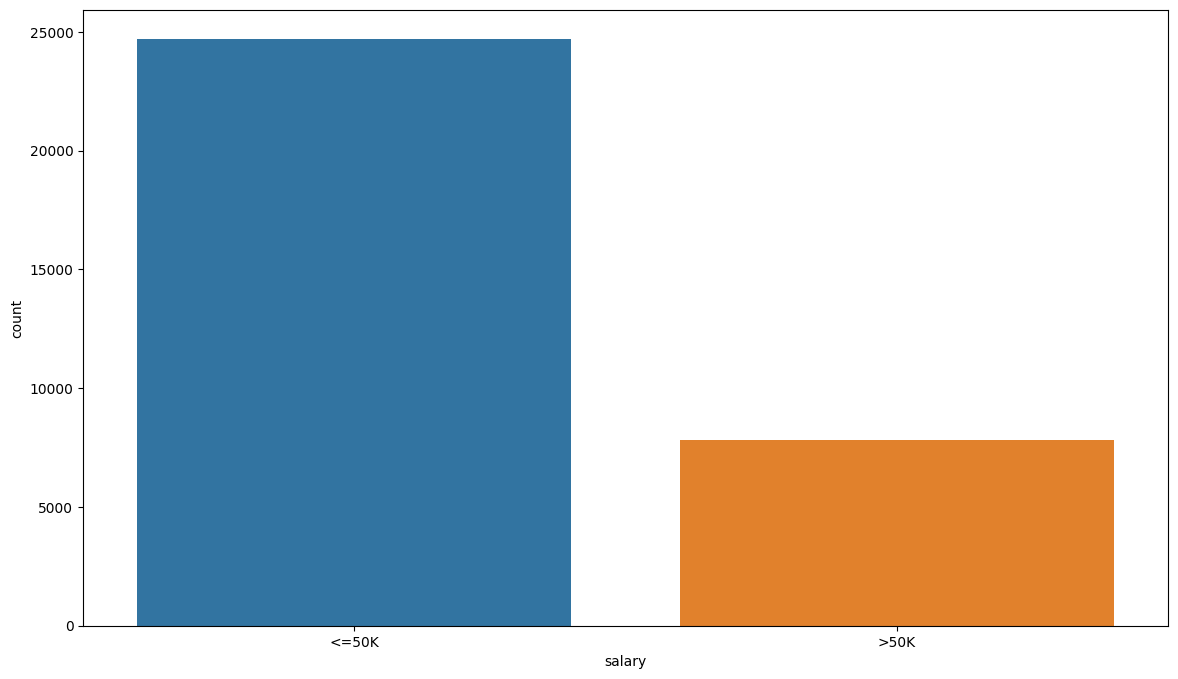

In [466]:
import matplotlib.pyplot as plt      # plots are not visually good but used for some settings
import seaborn as sns               #plots are graphically good
#1. to set figure size
plt.figure(figsize=(14,8))         # 14 is length 8 is breadth i.e, to describe the size of plot
sns.countplot(x='salary',data=df)  # x is the x-axis i.e, salary 


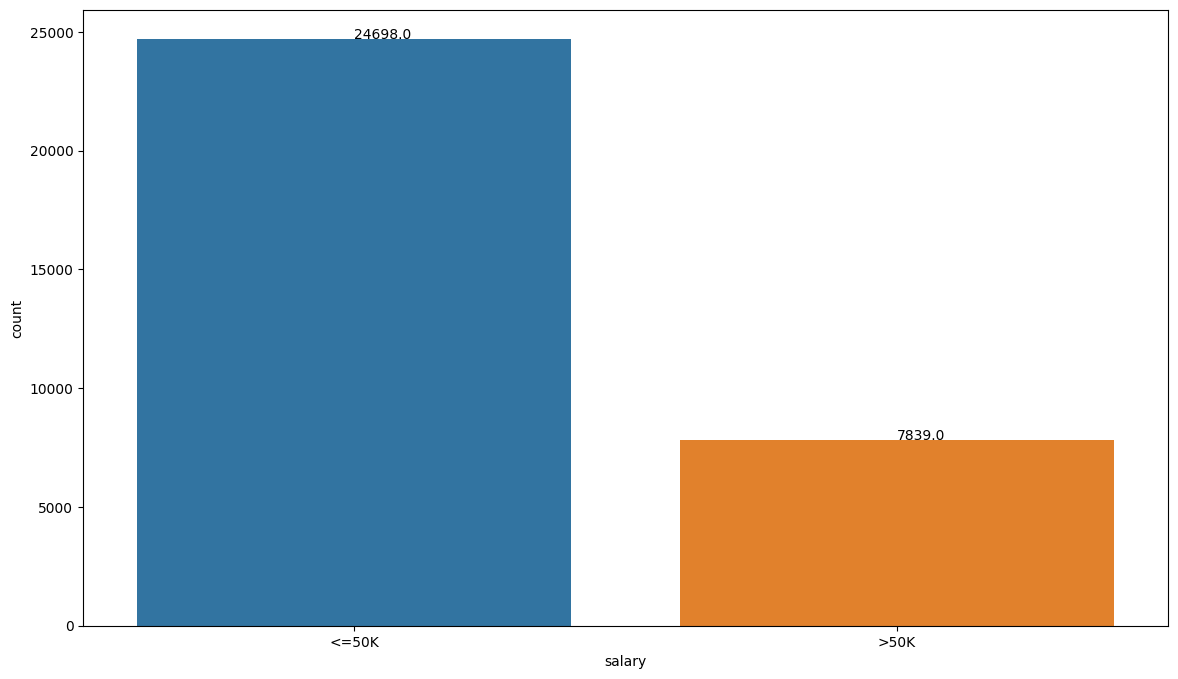

In [467]:
# to display the title at the top
import matplotlib.pyplot as plt      # plots are not visually good but used for some settings
import seaborn as sns               #plots are graphically good
#1. to set figure size
plt.figure(figsize=(14,8))         # 14 is length 8 is breadth i.e, to describe the size of plot
ax=sns.countplot(x='salary',data=df)
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.4,p.get_height()+10),fontsize=10)       # annotate means writing something at the top
    #get_height gives height and get_x gives position

In [468]:
percentage=df['salary'].value_counts()/len(df)
percentage

salary
<=50K    0.759074
>50K     0.240926
Name: count, dtype: float64

([<matplotlib.patches.Wedge at 0x7d3d5502c3a0>,
 [Text(-0.7996721738710164, 0.7553306655607218, '<=50k'),
  Text(0.7996721385114347, -0.7553307029960776, '>50k')])

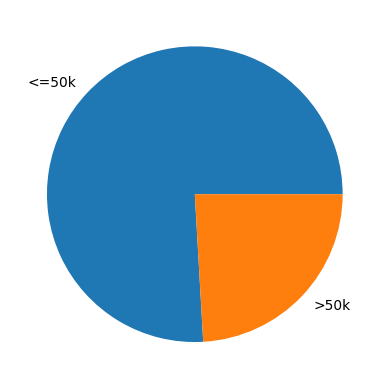

In [469]:
plt.pie(percentage,labels=['<=50k','>50k'])

([<matplotlib.patches.Wedge at 0x7d3d550d3970>,
 [Text(-0.7996721738710164, 0.7553306655607218, '<=50k'),
  Text(0.7996721385114347, -0.7553307029960776, '>50k')],
 [Text(-0.4361848221114634, 0.4119985448513028, '75.9%'),
  Text(0.4361848028244189, -0.41199856527058776, '24.1%')])

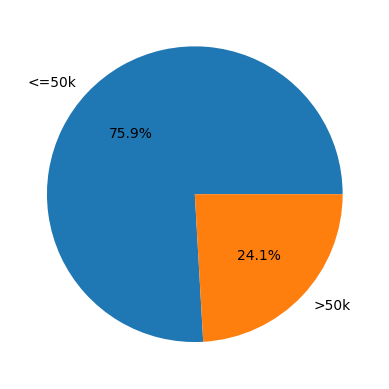

In [470]:
# to display numbers
plt.pie(percentage,labels=['<=50k','>50k'],autopct='%.1f%%')  # autopct displays numbers

([<matplotlib.patches.Wedge at 0x7d3d550e2080>,
 [Text(-0.7996721738710164, 0.7553306655607218, '<=50k'),
  Text(0.8723696056488378, -0.8239971305411756, '>50k')],
 [Text(-0.4361848221114634, 0.4119985448513028, '75.9%'),
  Text(0.5088822699618221, -0.48066499281568575, '24.1%')])

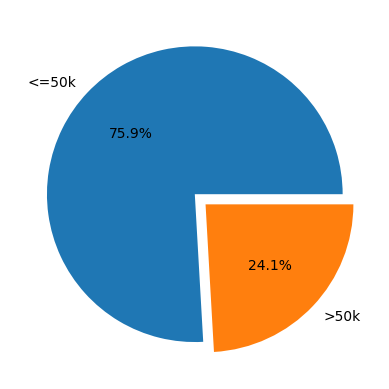

In [471]:
plt.pie(percentage,labels=['<=50k','>50k'],autopct='%.1f%%',explode=[0,0.1])

([<matplotlib.patches.Wedge at 0x7d3d559c0d30>,
 [Text(-0.7996721738710164, 0.7553306655607218, '<=50k'),
  Text(0.8723696056488378, -0.8239971305411756, '>50k')],
 [Text(-0.4361848221114634, 0.4119985448513028, '75.9%'),
  Text(0.5088822699618221, -0.48066499281568575, '24.1%')])

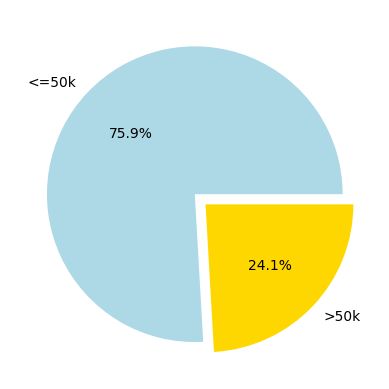

In [472]:
plt.pie(percentage,labels=['<=50k','>50k'],autopct='%.1f%%',explode=[0,0.1],
        colors=['lightblue','gold'])

([<matplotlib.patches.Wedge at 0x7d3d55997670>,
 [Text(-0.7996721738710164, 0.7553306655607218, '<=50k'),
  Text(0.8723696056488378, -0.8239971305411756, '>50k')],
 [Text(-0.4361848221114634, 0.4119985448513028, '75.9%'),
  Text(0.5088822699618221, -0.48066499281568575, '24.1%')])

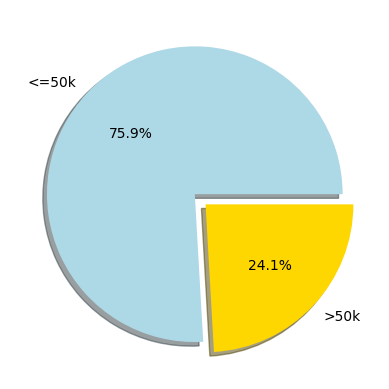

In [473]:
plt.pie(percentage,labels=['<=50k','>50k'],autopct='%.1f%%',explode=[0,0.1],
        colors=['lightblue','gold'],shadow=True)

Text(0.5, 1.0, 'Pie chart of salary')

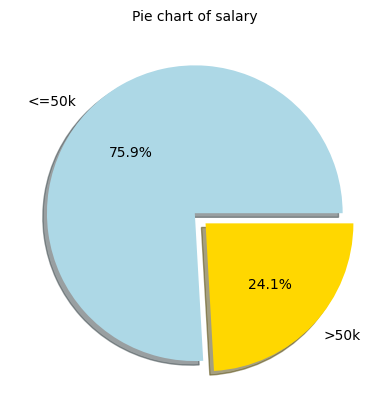

In [474]:
plt.pie(percentage,labels=['<=50k','>50k'],autopct='%.1f%%',explode=[0,0.1],
        colors=['lightblue','gold'],shadow=True)
plt.title("Pie chart of salary",fontsize=10)

In [475]:
'''
Conclusion:
75.9% of the people's salary is lesser than 50k and 
rest 24.1% of people salary is greater than 50k

'''

"\nConclusion:\n75.9% of the people's salary is lesser than 50k and \nrest 24.1% of people salary is greater than 50k\n\n"

**Numeric Data**

**Age**

In [476]:
# age
df['age'].value_counts    # numerical

<bound method IndexOpsMixin.value_counts of 0        39
1        50
2        38
3        53
4        28
         ..
32556    27
32557    40
32558    58
32559    22
32560    52
Name: age, Length: 32537, dtype: int64>

<Axes: xlabel='age'>

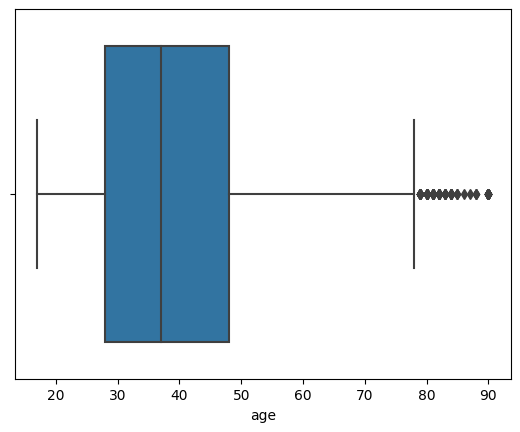

In [477]:
sns.boxplot(x='age',data=df)     #25%quantile  50%(median)quantile 75%quantile  and the dots are the outliers of the data

<Axes: xlabel='age', ylabel='Count'>

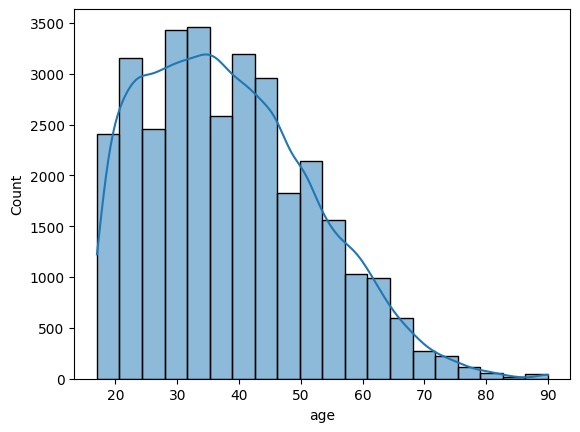

In [478]:
sns.histplot(x='age',data=df,kde=True,bins=20)  # kde is a distribution which helps to draw that line and bins means the size of histogram

In [479]:
df['age'].describe()

count    32537.000000
mean        38.585549
std         13.637984
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

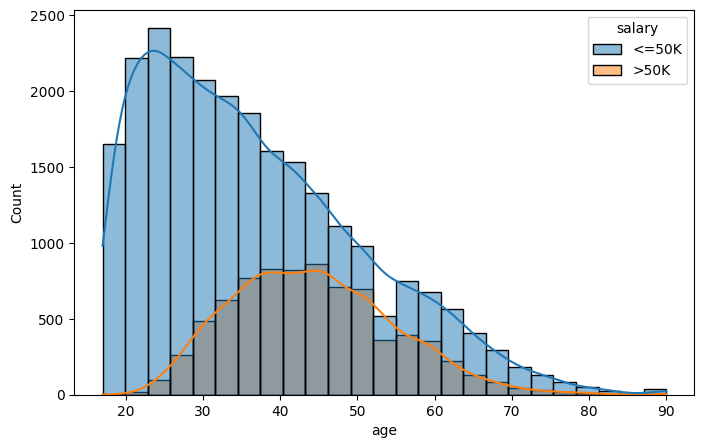

In [480]:
# comparing both the age and the salary data

plt.figure(figsize=(8,5))
sns.histplot(x='age',hue='salary',kde=True,data=df,bins=25)

<Axes: xlabel='salary', ylabel='age'>

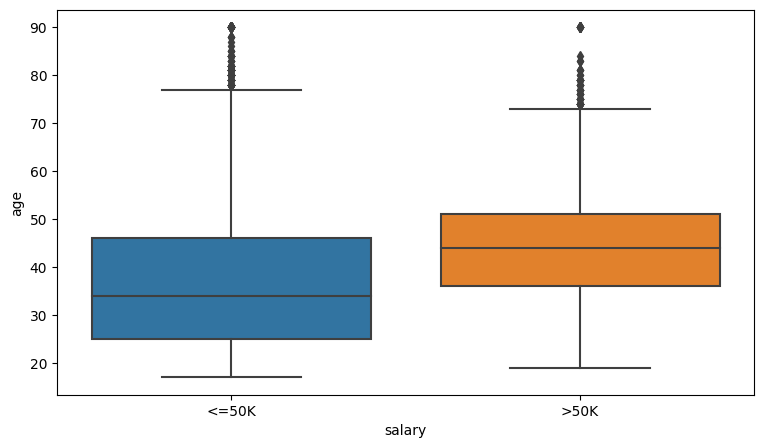

In [481]:
plt.figure(figsize=(9,5))
sns.boxplot(x='salary',y='age',data=df)

In [482]:
df.groupby('salary')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.0,36.787392,14.017335,17.0,25.0,34.0,46.0,90.0
>50K,7839.0,44.250925,10.520102,19.0,36.0,44.0,51.0,90.0


In [483]:
'''
The mean and median age of the high-income group is higher than the low-income group.
It means the older generation possesses more wealth than the young
'''

'\nThe mean and median age of the high-income group is higher than the low-income group.\nIt means the older generation possesses more wealth than the young\n'

In [484]:
#fnlwgt    # checks the box plot to see exteme values
df['fnlwgt'].value_counts()     #numerical

fnlwgt
164190    13
123011    13
203488    13
148995    12
113364    12
          ..
138342     1
158040     1
232784     1
325573     1
257302     1
Name: count, Length: 21648, dtype: int64

<Axes: xlabel='fnlwgt', ylabel='Count'>

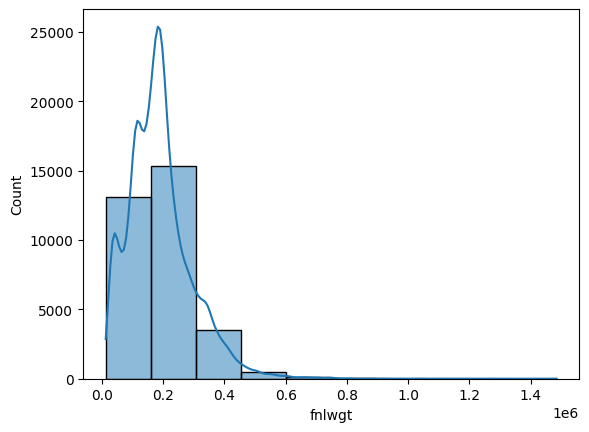

In [485]:
sns.histplot(x='fnlwgt',data=df,kde=True,bins=10)

<Axes: xlabel='fnlwgt', ylabel='Density'>

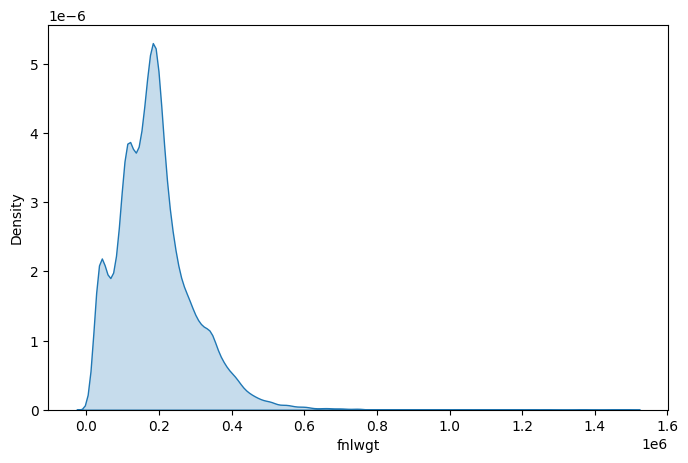

In [486]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='fnlwgt',data=df,fill=True)

<Axes: xlabel='fnlwgt', ylabel='Density'>

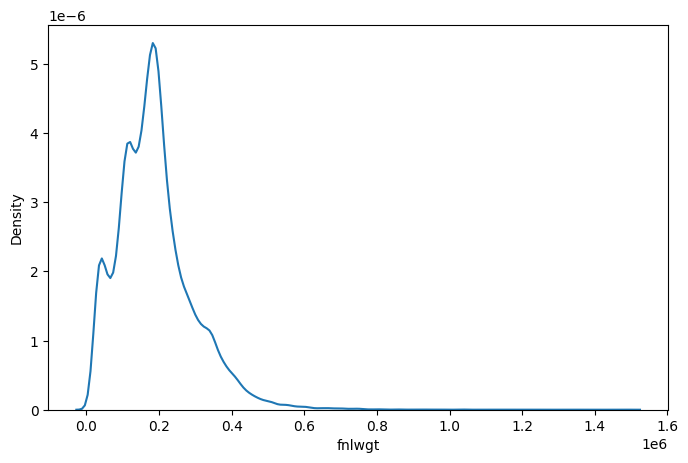

In [487]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='fnlwgt',data=df,fill=False)

<Axes: xlabel='fnlwgt'>

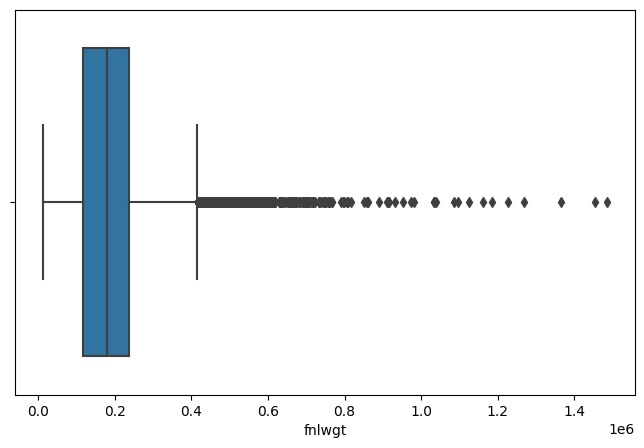

In [488]:
plt.figure(figsize=(8,5))
sns.boxplot(x='fnlwgt',data=df)

<Axes: xlabel='salary', ylabel='fnlwgt'>

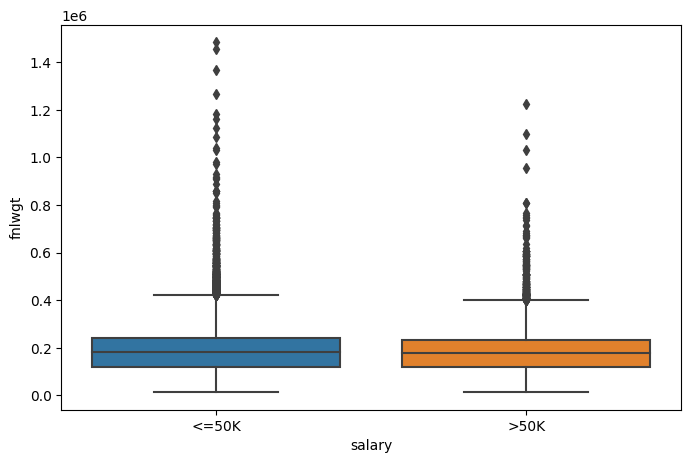

In [489]:
#comparing salary and fnlwgt

plt.figure(figsize=(8,5))
sns.boxplot(x='salary',y='fnlwgt',data=df)

<Axes: xlabel='fnlwgt', ylabel='Count'>

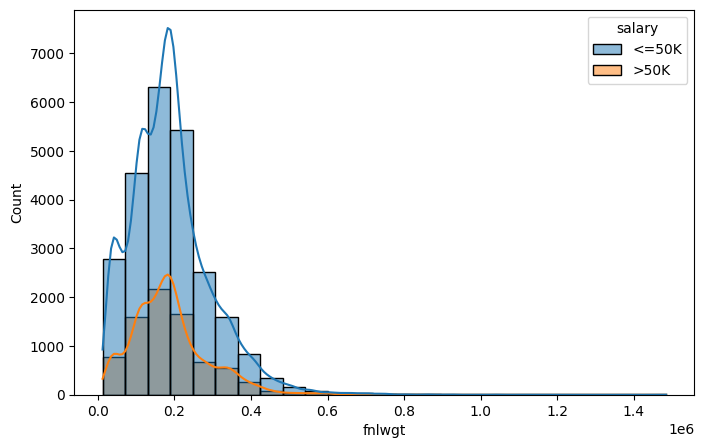

In [490]:
plt.figure(figsize=(8,5))
sns.histplot(x='fnlwgt',hue='salary',data=df,kde=True,bins=25)

In [491]:
df.groupby('salary')['fnlwgt'].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.0,190345.926796,106487.413197,12285.0,117606.0,179465.0,238968.25,1484705.0
>50K,7839.0,188000.480674,102554.464101,14878.0,119100.0,176063.0,230969.00,1226583.0


In [492]:
'''
Conclusion:
There is no significant difference between high and low income groups according to fnlwgt feature
'''

'\nConclusion:\nThere is no significant difference between high and low income groups according to fnlwgt feature\n'

In [493]:
#capital_gain
df['capital_gain'].value_counts()     #numerical

capital_gain
0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: count, Length: 119, dtype: int64

<Axes: xlabel='capital_gain', ylabel='Density'>

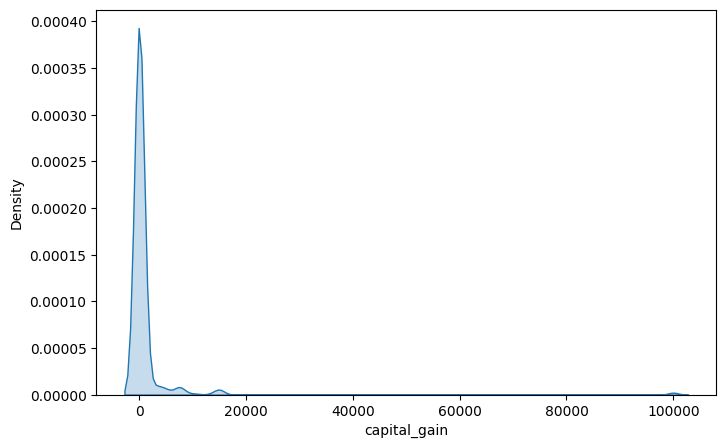

In [494]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='capital_gain',data=df,fill=True)

<Axes: xlabel='capital_gain'>

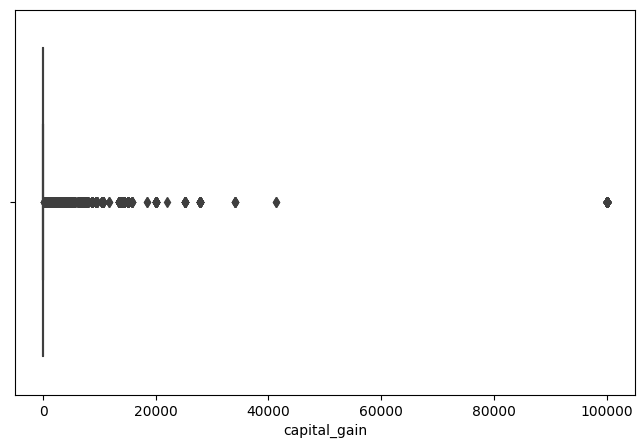

In [495]:
plt.figure(figsize=(8,5))
sns.boxplot(x='capital_gain',data=df)

<Axes: xlabel='salary', ylabel='capital_gain'>

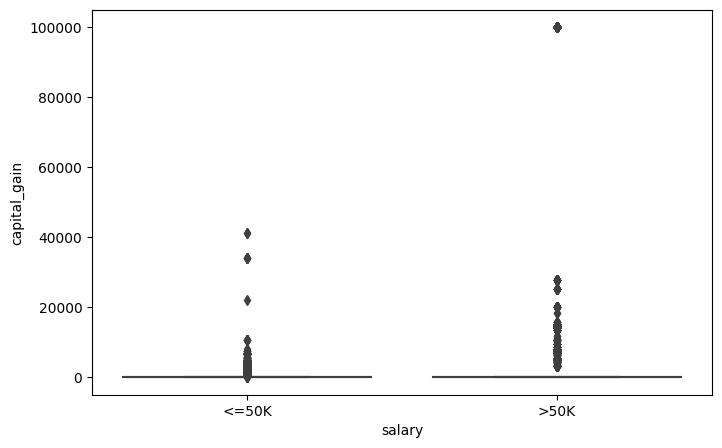

In [496]:
#comparing salary and capital_gain

plt.figure(figsize=(8,5))
sns.boxplot(x='salary',y='capital_gain',data=df)

<Axes: xlabel='capital_gain', ylabel='Count'>

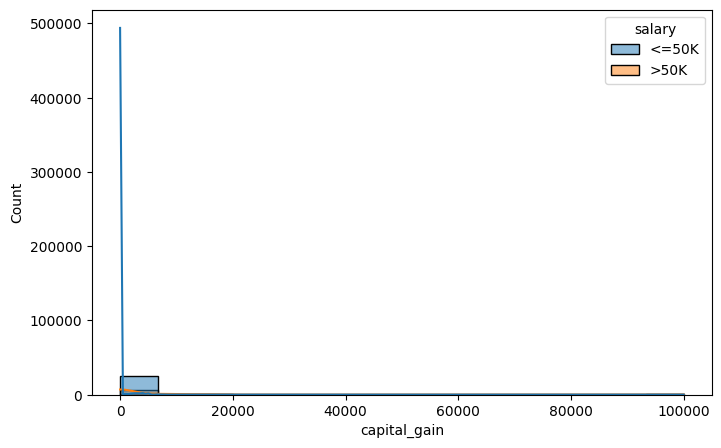

In [497]:
plt.figure(figsize=(8,5))
sns.histplot(x='capital_gain',hue='salary',data=df,kde=True,bins=15)

In [498]:
df.groupby('salary')['capital_gain'].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.0,148.884970,963.557955,0.0,0.0,0.0,0.0,41310.0
>50K,7839.0,4007.164562,14572.097223,0.0,0.0,0.0,0.0,99999.0


In [499]:
# Check the statistical values by "salary" levels for capital_gain not equal the zero
df.loc[df['capital_gain'] != 0].groupby('salary')['capital_gain'].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,1035.0,3552.81256,3173.419287,114.0,2202.0,3273.0,4101.0,41310.0
>50K,1677.0,18731.16458,26778.676066,3103.0,7298.0,7896.0,15024.0,99999.0


In [500]:
'''
Conclusion:
The "capital-gain" feature has not provided very meaningful insights. 
Nevertheless, we can say that the more "capital-gain", the more "high-income".
'''

'\nConclusion:\nThe "capital-gain" feature has not provided very meaningful insights. \nNevertheless, we can say that the more "capital-gain", the more "high-income".\n'

In [501]:
#capital_loss
df['capital_loss'].value_counts()      #numerical

capital_loss
0       31018
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: count, Length: 92, dtype: int64

<Axes: xlabel='capital_loss', ylabel='Density'>

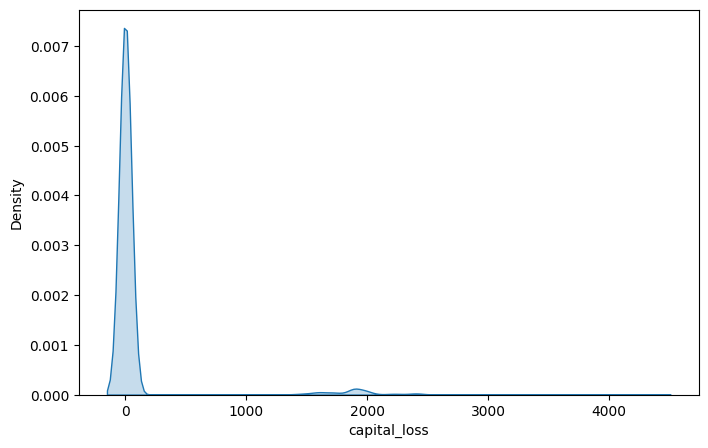

In [502]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='capital_loss',data=df,fill=True)

<Axes: xlabel='capital_loss'>

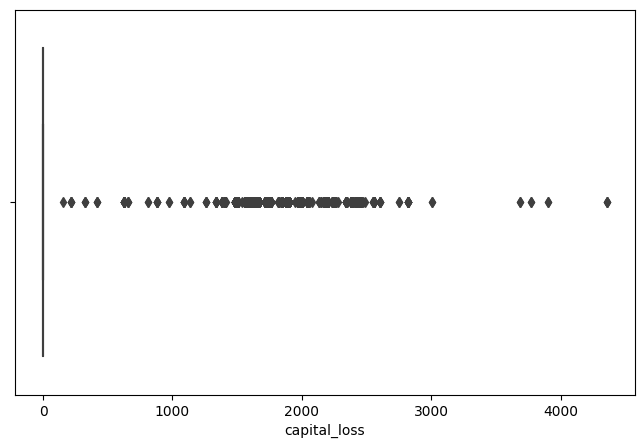

In [503]:
plt.figure(figsize=(8,5))
sns.boxplot(x='capital_loss',data=df)

<Axes: xlabel='capital_loss', ylabel='Count'>

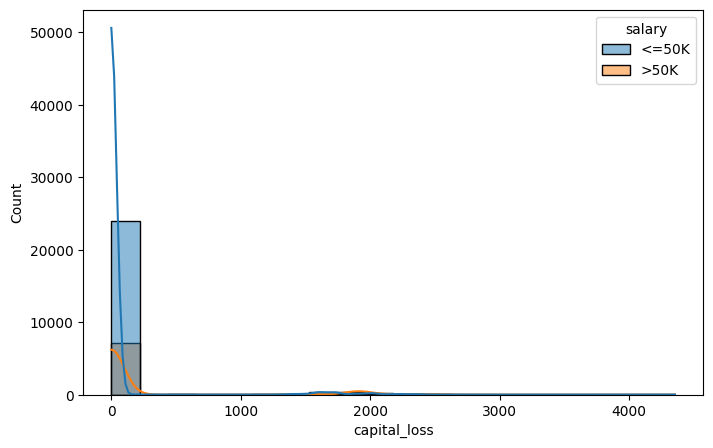

In [504]:
#compare salary and capital loss

plt.figure(figsize=(8,5))
sns.histplot(x='capital_loss',hue='salary',data=df,kde=True,bins=20)

<Axes: xlabel='salary', ylabel='capital_loss'>

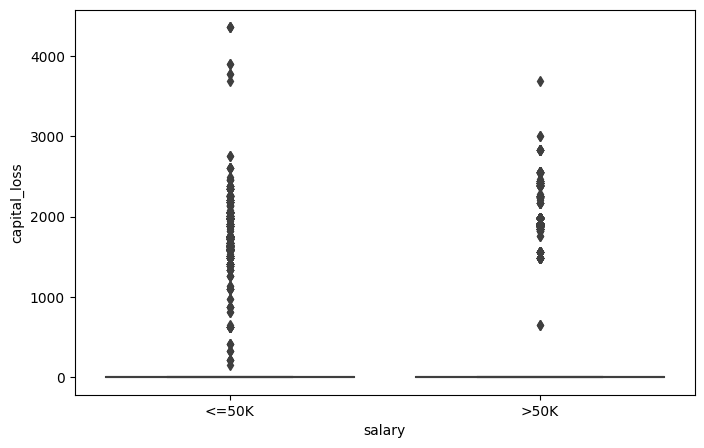

In [505]:
plt.figure(figsize=(8,5))
sns.boxplot(x='salary',y='capital_loss',data=df)

In [506]:
df.groupby('salary')['capital_loss'].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.0,53.190258,310.890099,0.0,0.0,0.0,0.0,4356.0
>50K,7839.0,195.051282,595.555395,0.0,0.0,0.0,0.0,3683.0


In [507]:
df.loc[df['capital_loss']!=0].groupby('salary')['capital_loss'].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,746.0,1760.982574,438.906164,155.0,1590.0,1721.0,1980.0,4356.0
>50K,773.0,1978.016818,264.143642,653.0,1887.0,1902.0,1977.0,3683.0


In [508]:
'''
Conclusion:
There is no significant difference between high and low_income groups according to the capital_loss
'''

'\nConclusion:\nThere is no significant difference between high and low_income groups according to the capital_loss\n'

In [509]:
# hours per week
df['hours_per_week'].value_counts()        #numerical

hours_per_week
40    15204
50     2817
45     1823
60     1475
35     1296
      ...  
82        1
92        1
87        1
74        1
94        1
Name: count, Length: 94, dtype: int64

<Axes: xlabel='hours_per_week', ylabel='Density'>

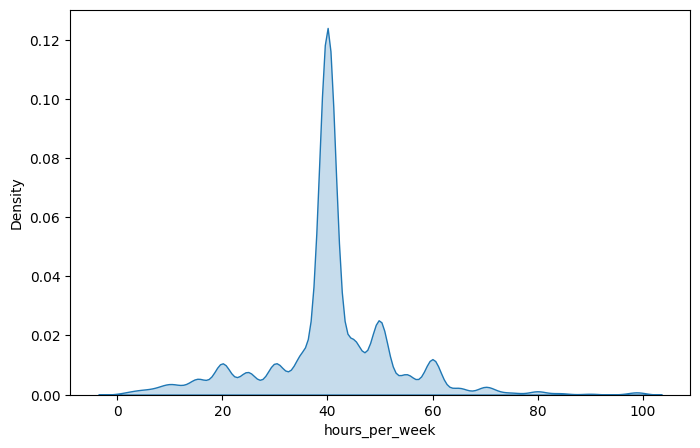

In [510]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='hours_per_week',data=df,fill=True)

<Axes: xlabel='hours_per_week'>

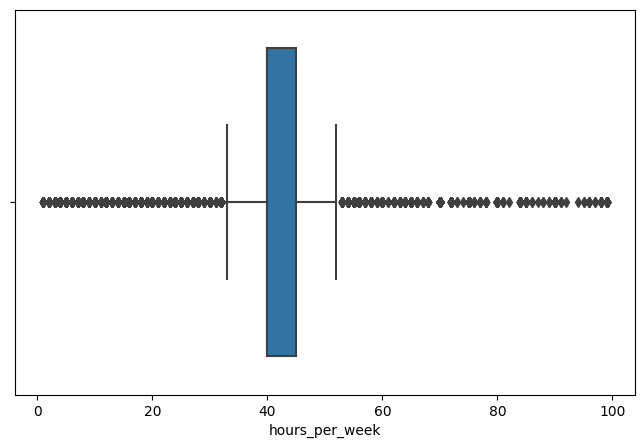

In [511]:
plt.figure(figsize=(8,5))
sns.boxplot(x='hours_per_week',data=df)

<Axes: xlabel='hours_per_week', ylabel='Count'>

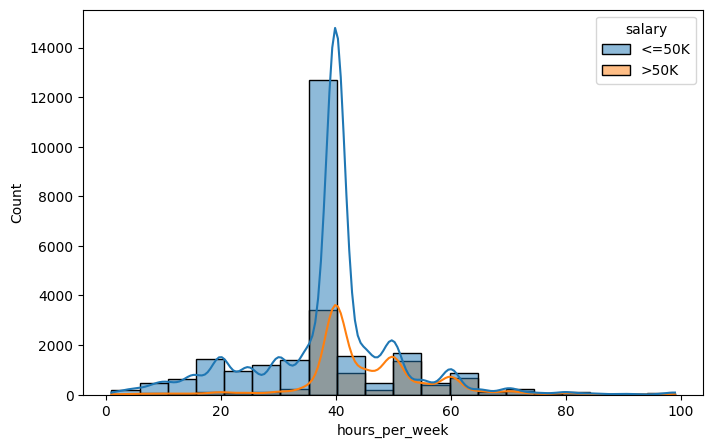

In [512]:
#comparing salary and hours per week

plt.figure(figsize=(8,5))
sns.histplot(x='hours_per_week',hue='salary',data=df,kde=True,bins=20)

<Axes: xlabel='salary', ylabel='hours_per_week'>

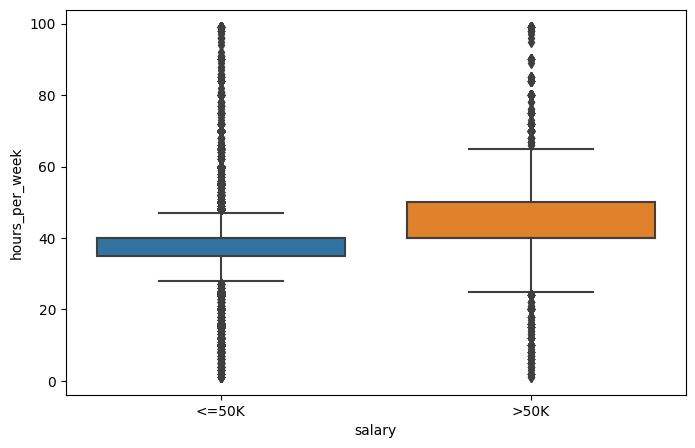

In [513]:
plt.figure(figsize=(8,5))
sns.boxplot(x='salary',y='hours_per_week',data=df)

In [514]:
df.groupby('salary')['hours_per_week'].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.0,38.842862,12.318286,1.0,35.0,40.0,40.0,99.0
>50K,7839.0,45.473402,11.014165,1.0,40.0,40.0,50.0,99.0


In [515]:
'''
Conclusion:
To be in a high-income group, almost at least 40 hours working per week is required. 
Most of those who work less than 40 hours per week are in the low-income group.
'''

'\nConclusion:\nTo be in a high-income group, almost at least 40 hours working per week is required. \nMost of those who work less than 40 hours per week are in the low-income group.\n'

In [516]:
'''
Pairplot: Generally used to see the relationship between each numeric features by target feature (salary) in one plot basically
'''

'\nPairplot: Generally used to see the relationship between each numeric features by target feature (salary) in one plot basically\n'

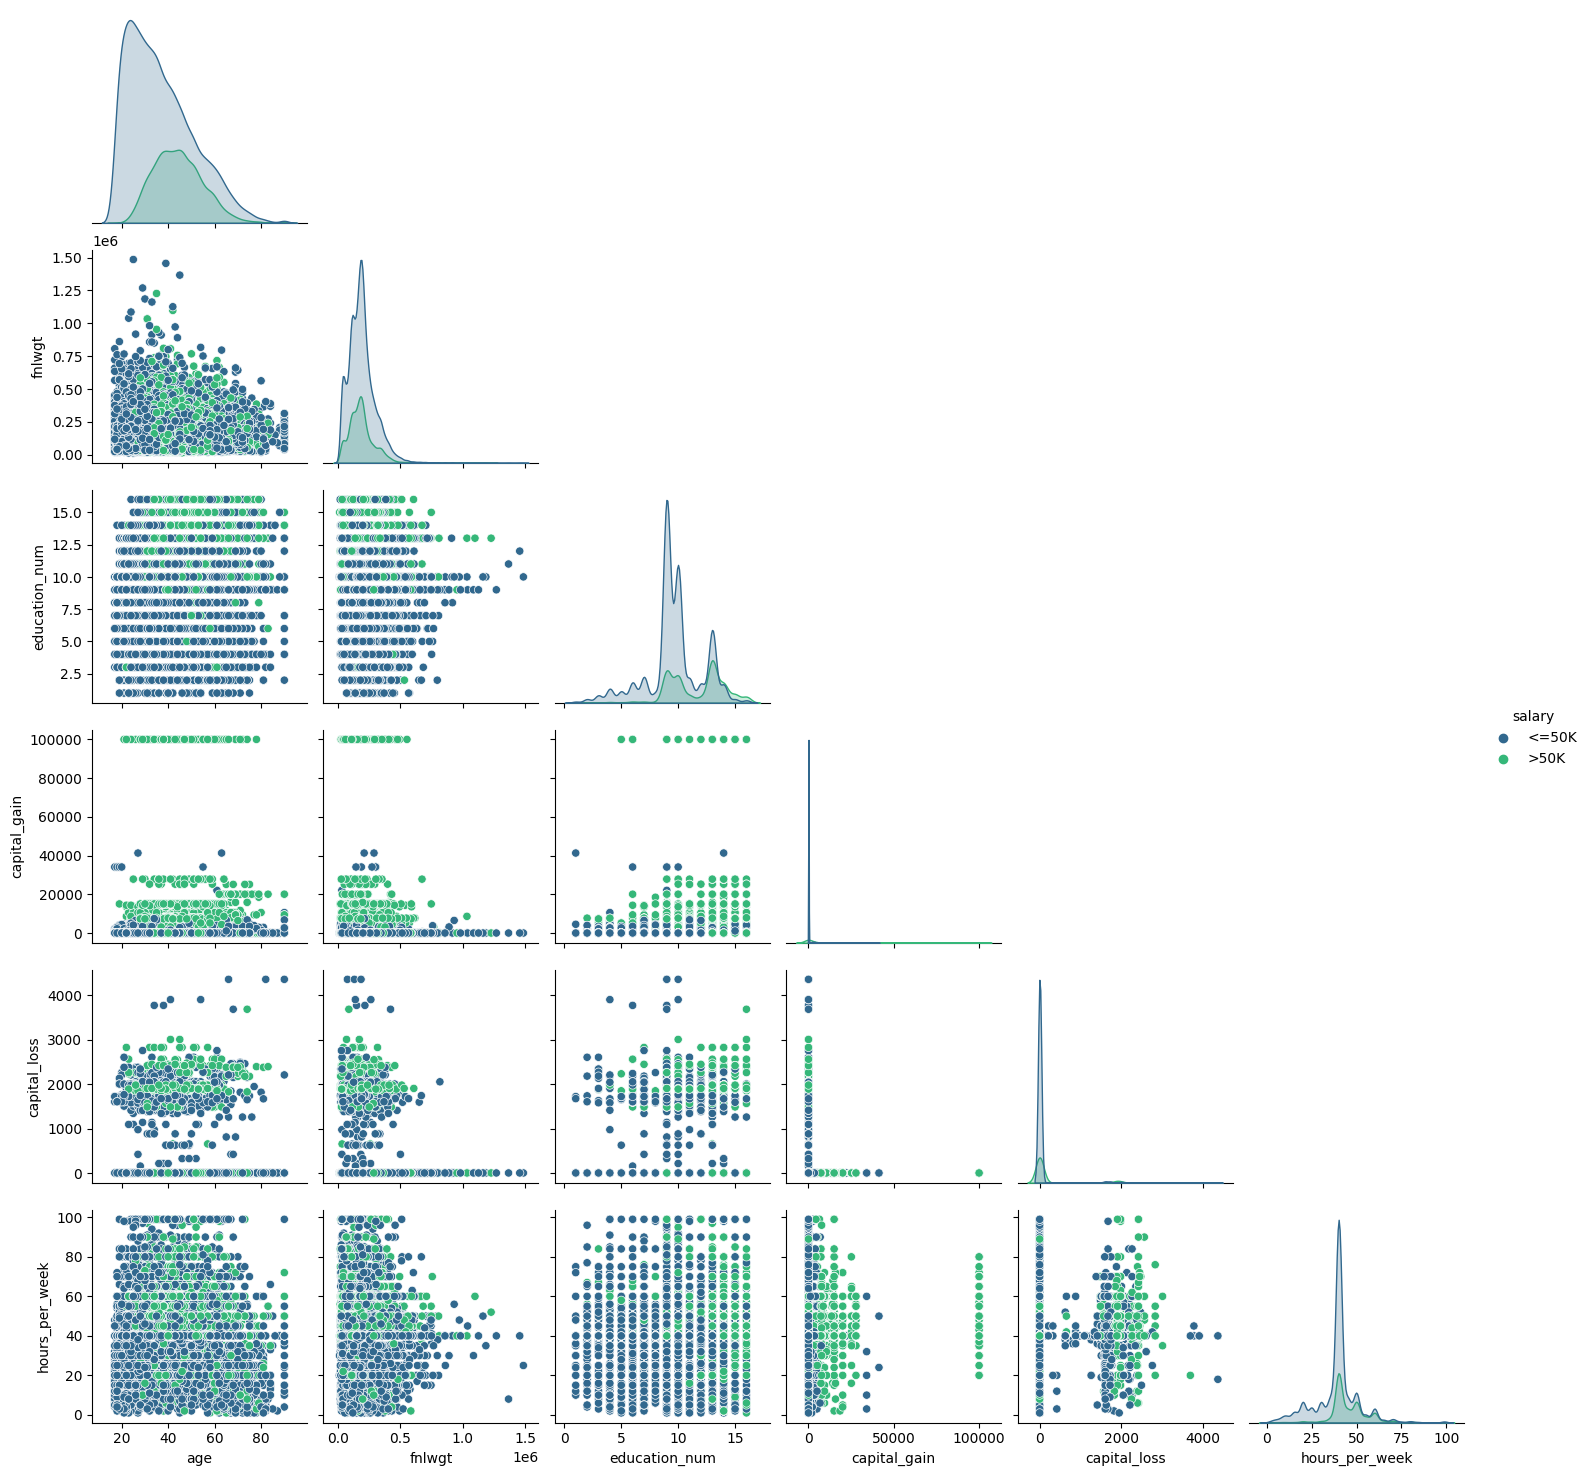

In [517]:
sns.pairplot(df,hue="salary",palette="viridis",corner=True,diag_kind="kde");

In [518]:
df['education_num'].value_counts(dropna=False)

education_num
9.0     10208
10.0     7089
13.0     5245
14.0     1686
11.0     1343
7.0      1146
12.0     1044
6.0       916
NaN       802
4.0       630
15.0      559
5.0       503
8.0       424
16.0      405
3.0       329
2.0       159
1.0        49
Name: count, dtype: int64

In [519]:
#education_num
df['education_num'].value_counts()      #categorical

education_num
9.0     10208
10.0     7089
13.0     5245
14.0     1686
11.0     1343
7.0      1146
12.0     1044
6.0       916
4.0       630
15.0      559
5.0       503
8.0       424
16.0      405
3.0       329
2.0       159
1.0        49
Name: count, dtype: int64

In [520]:
df.education_num.unique()

array([13.,  9.,  7., 14.,  5., 10., 12., nan,  4., 16., 11., 15.,  3.,
        6.,  2.,  1.,  8.])

<Axes: xlabel='education_num', ylabel='count'>

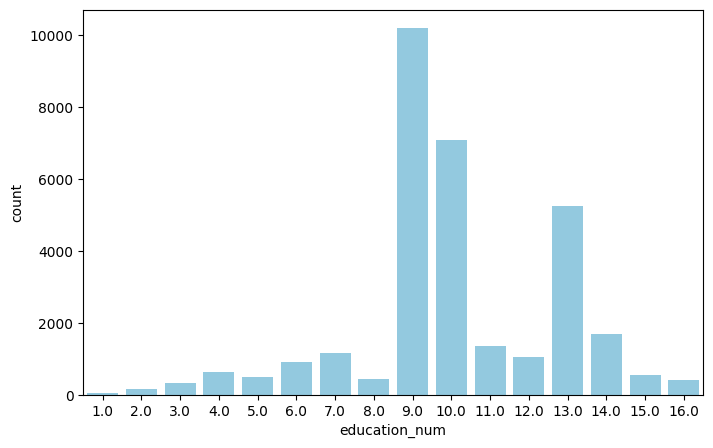

In [521]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(x='education_num',data=df,color='skyblue') 

Categorical, Categorical

In [522]:
df.groupby(['education'])['education_num'].value_counts()

education     education_num
10th          6.0                916
11th          7.0               1146
12th          8.0                424
1st-4th       2.0                159
5th-6th       3.0                329
7th-8th       4.0                630
9th           5.0                503
Assoc-acdm    12.0              1044
Assoc-voc     11.0              1343
Bachelors     13.0              5245
Doctorate     16.0               405
HS-grad       9.0              10208
Masters       14.0              1686
Preschool     1.0                 49
Prof-school   15.0               559
Some-college  10.0              7089
Name: count, dtype: int64

In [523]:
df.groupby(["education"])["education_num"].value_counts(dropna=False)

education     education_num
10th          6.0                916
              NaN                 17
11th          7.0               1146
              NaN                 29
12th          8.0                424
              NaN                  9
1st-4th       2.0                159
              NaN                  7
5th-6th       3.0                329
              NaN                  3
7th-8th       4.0                630
              NaN                 15
9th           5.0                503
              NaN                 11
Assoc-acdm    12.0              1044
              NaN                 23
Assoc-voc     11.0              1343
              NaN                 39
Bachelors     13.0              5245
              NaN                108
Doctorate     16.0               405
              NaN                  8
HS-grad       9.0              10208
              NaN                286
Masters       14.0              1686
              NaN                 36
Preschool 

In [524]:
#education
df['education'].value_counts()      # categorical
#or
#df.education.value_counts(dropna=False)

education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64

In [525]:
df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

<Axes: xlabel='education', ylabel='count'>

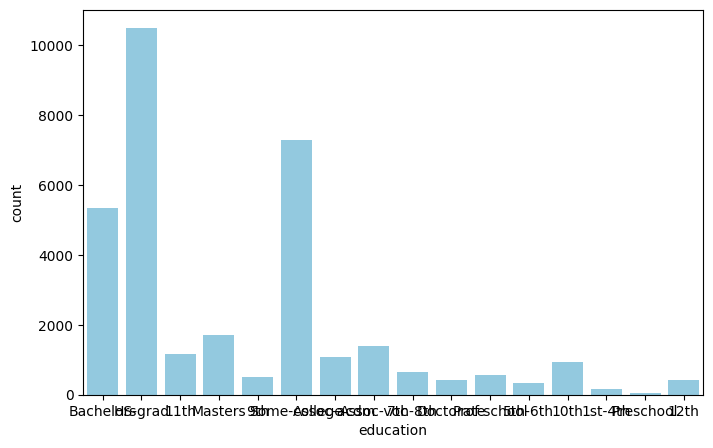

In [526]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(x='education',data=df,color='skyblue')

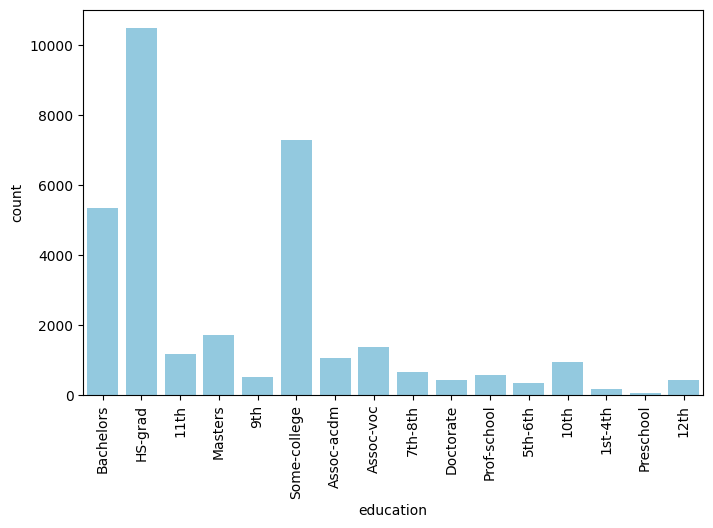

In [527]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(x='education',data=df,color='skyblue')
ax.set_xticklabels(df.education.unique(),rotation=90);     #used for labellingg vertically

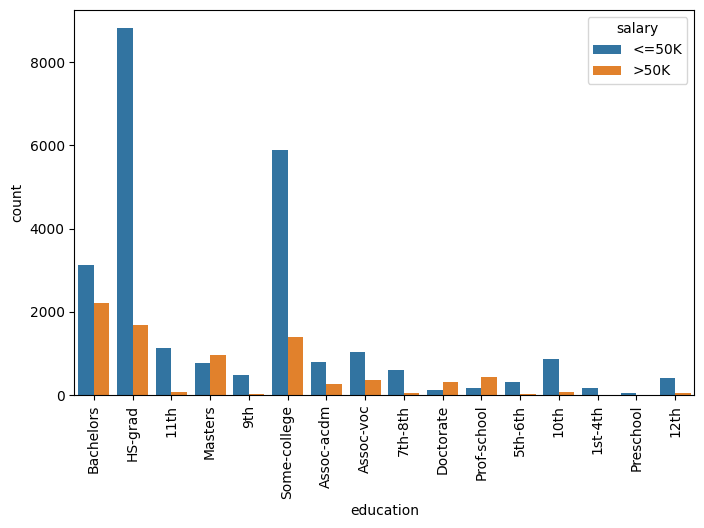

In [528]:
# Check the count of person in each "salary" levels by the feature education and visualize them with countplot

fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(x='education',data=df,hue='salary')
ax.set_xticklabels(df.education.unique(),rotation=90);

In [529]:
df.groupby('education')['salary'].value_counts(dropna=False)

education     salary
10th          <=50K      871
              >50K        62
11th          <=50K     1115
              >50K        60
12th          <=50K      400
              >50K        33
1st-4th       <=50K      160
              >50K         6
5th-6th       <=50K      316
              >50K        16
7th-8th       <=50K      605
              >50K        40
9th           <=50K      487
              >50K        27
Assoc-acdm    <=50K      802
              >50K       265
Assoc-voc     <=50K     1021
              >50K       361
Bachelors     <=50K     3132
              >50K      2221
Doctorate     >50K       306
              <=50K      107
HS-grad       <=50K     8820
              >50K      1674
Masters       >50K       959
              <=50K      763
Preschool     <=50K       50
Prof-school   >50K       423
              <=50K      153
Some-college  <=50K     5896
              >50K      1386
Name: count, dtype: int64

In [530]:
df.groupby("education_num")["salary"].value_counts(dropna=False)

education_num  salary
1.0            <=50K       49
2.0            <=50K      153
               >50K         6
3.0            <=50K      313
               >50K        16
4.0            <=50K      592
               >50K        38
5.0            <=50K      477
               >50K        26
6.0            <=50K      854
               >50K        62
7.0            <=50K     1088
               >50K        58
8.0            <=50K      391
               >50K        33
9.0            <=50K     8579
               >50K      1629
10.0           <=50K     5746
               >50K      1343
11.0           <=50K      994
               >50K       349
12.0           <=50K      787
               >50K       257
13.0           <=50K     3078
               >50K      2167
14.0           >50K       935
               <=50K      751
15.0           >50K       410
               <=50K      149
16.0           >50K       302
               <=50K      103
Name: count, dtype: int64

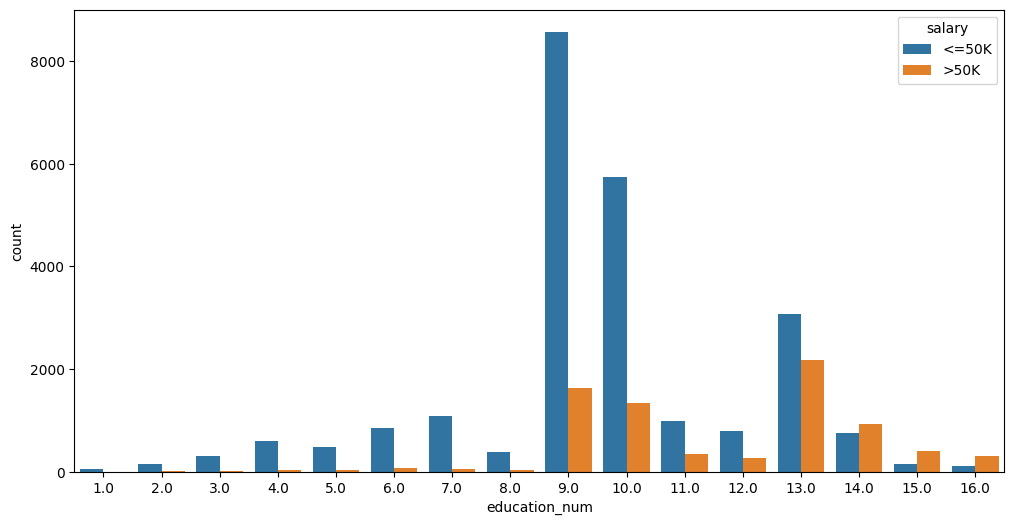

In [531]:
fig,ax = plt.subplots(figsize=(12,6))

sns.countplot(x="education_num",data=df,hue="salary");

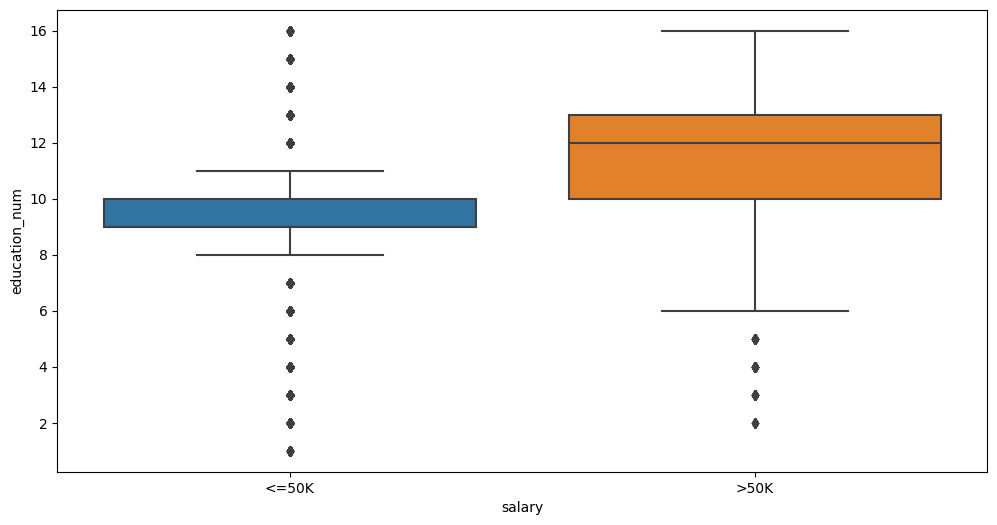

In [532]:
plt.figure(figsize=(12,6))

sns.boxplot(x="salary",y="education_num",data=df);

In [533]:
'''
To plot a piechart:
Decrease the number of categories in "education" feature as low, medium, and high level and 
create a new feature with this new categorical data.
'''

'\nTo plot a piechart:\nDecrease the number of categories in "education" feature as low, medium, and high level and \ncreate a new feature with this new categorical data.\n'

In [534]:
def mapping_education(x):
    if x in ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th"]:
             return "low_level_grade"
    if x in ["HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm"]:
             return "medium_level_grades"
    if x in ["Bachelors", "Masters", "Prof-school", "Doctorate"]:
             return "high_level_grade"

In [535]:
df.education.apply(mapping_education).value_counts()

education
medium_level_grades    20225
high_level_grade        8064
low_level_grade         4248
Name: count, dtype: int64

In [536]:
df['education_summary']=df.education.apply(mapping_education)
df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary,education_summary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,high_level_grade
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,high_level_grade


<Axes: xlabel='education_summary', ylabel='count'>

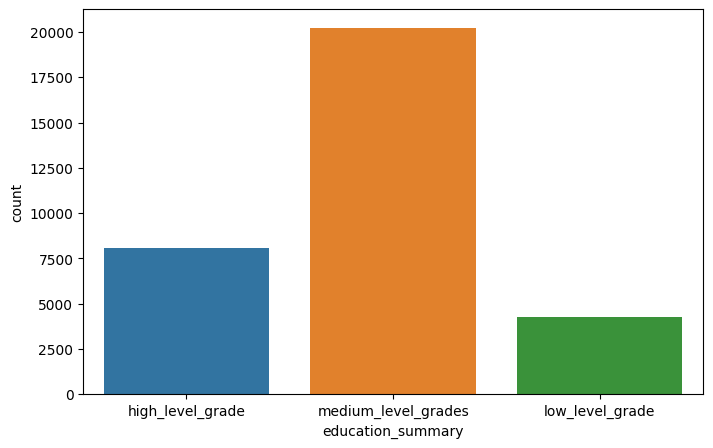

In [537]:
plt.subplots(figsize=(8,5))
sns.countplot(x='education_summary',data=df)

In [538]:
df.groupby("education_summary")["salary"].value_counts()

education_summary    salary
high_level_grade     <=50K      4155
                     >50K       3909
low_level_grade      <=50K      4004
                     >50K        244
medium_level_grades  <=50K     16539
                     >50K       3686
Name: count, dtype: int64

<Axes: xlabel='education_summary', ylabel='count'>

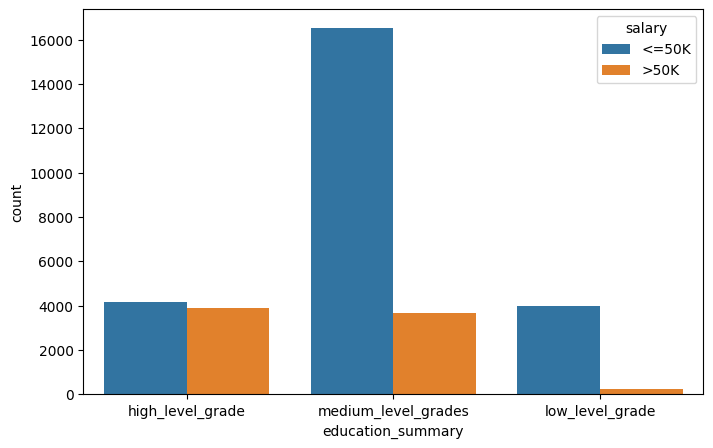

In [539]:
plt.subplots(figsize=(8,5))
sns.countplot(x='education_summary',data=df,hue='salary')

In [540]:
df.groupby('education_summary')['salary'].value_counts()

education_summary    salary
high_level_grade     <=50K      4155
                     >50K       3909
low_level_grade      <=50K      4004
                     >50K        244
medium_level_grades  <=50K     16539
                     >50K       3686
Name: count, dtype: int64

In [541]:
(df.groupby('education_summary')['salary']).count()

education_summary
high_level_grade        8064
low_level_grade         4248
medium_level_grades    20225
Name: salary, dtype: int64

In [542]:
z = ((df.groupby("education_summary")["salary"]).value_counts() / (df.groupby("education_summary")["salary"]).count()).values*100
z

array([51.52529762, 48.47470238, 94.25612053,  5.74387947, 81.7750309 ,
       18.2249691 ])

In [543]:
percentage = (df.groupby('education_summary')['salary']).value_counts()/ (df.groupby('education_summary')['salary']).count()
percentage

education_summary    salary
high_level_grade     <=50K     0.515253
                     >50K      0.484747
low_level_grade      <=50K     0.942561
                     >50K      0.057439
medium_level_grades  <=50K     0.817750
                     >50K      0.182250
dtype: float64

In [544]:
high= percentage[:2]
high

education_summary  salary
high_level_grade   <=50K     0.515253
                   >50K      0.484747
dtype: float64

In [545]:
high=((df.groupby("education_summary")["salary"]).value_counts() / (df.groupby("education_summary")["salary"]).count())[:2]
high

education_summary  salary
high_level_grade   <=50K     0.515253
                   >50K      0.484747
dtype: float64

In [546]:
low= percentage[2:4]
low

education_summary  salary
low_level_grade    <=50K     0.942561
                   >50K      0.057439
dtype: float64

In [547]:
low =((df.groupby("education_summary")["salary"]).value_counts() / (df.groupby("education_summary")["salary"]).count())[2:4]
low

education_summary  salary
low_level_grade    <=50K     0.942561
                   >50K      0.057439
dtype: float64

In [548]:
medium= percentage[4:]
medium

education_summary    salary
medium_level_grades  <=50K     0.81775
                     >50K      0.18225
dtype: float64

In [549]:
medium =((df.groupby("education_summary")["salary"]).value_counts() / (df.groupby("education_summary")["salary"]).count())[4:6]
medium

education_summary    salary
medium_level_grades  <=50K     0.81775
                     >50K      0.18225
dtype: float64

Text(0, 0.5, 'salary')

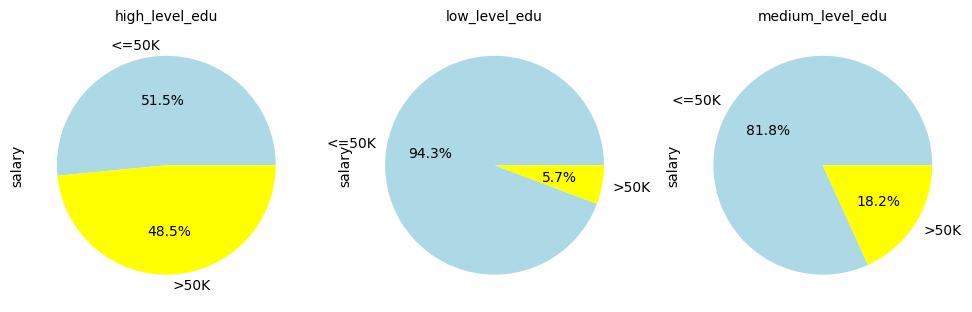

In [550]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(12,6))

ax1.pie(high, labels=['<=50K','>50K'],autopct='%0.1f%%',colors=['lightblue','yellow'])
ax1.set_title('high_level_edu',fontsize=10)
ax1.set_ylabel('salary')

ax2.pie(low, labels=['<=50K','>50K'],autopct='%0.1f%%',colors=['lightblue','yellow'])
ax2.set_title('low_level_edu',fontsize=10)
ax2.set_ylabel('salary')

ax3.pie(medium, labels=['<=50K','>50K'],autopct='%0.1f%%',colors=['lightblue','yellow'])
ax3.set_title('medium_level_edu',fontsize=10)
ax3.set_ylabel('salary')

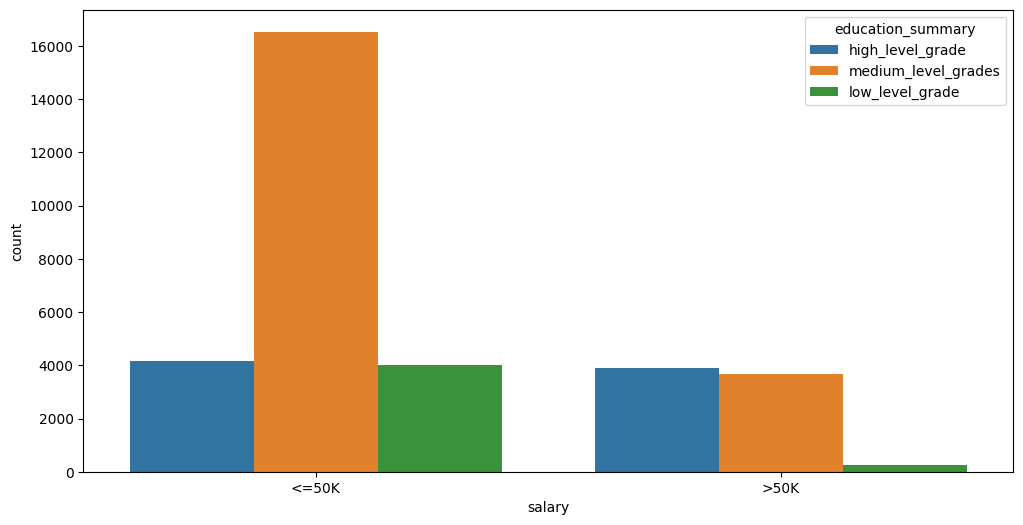

In [551]:
plt.figure(figsize=(12,6))
sns.countplot(x="salary",data=df,hue="education_summary");

In [552]:
df.groupby('salary')['education_summary'].value_counts()

salary  education_summary  
<=50K   medium_level_grades    16539
        high_level_grade        4155
        low_level_grade         4004
>50K    high_level_grade        3909
        medium_level_grades     3686
        low_level_grade          244
Name: count, dtype: int64

In [553]:
(df.groupby('salary')['education_summary']).count()

salary
<=50K    24698
>50K      7839
Name: education_summary, dtype: int64

In [554]:
p=(df.groupby('salary')['education_summary'].value_counts())/(df.groupby('salary')['education_summary']).count()
p

salary  education_summary  
<=50K   medium_level_grades    0.669649
        high_level_grade       0.168232
        low_level_grade        0.162118
>50K    high_level_grade       0.498661
        medium_level_grades    0.470213
        low_level_grade        0.031126
dtype: float64

In [555]:
lower_50K=((df.groupby("salary")["education_summary"]).value_counts() / (df.groupby("salary")["education_summary"]).count())[0:3]
lower_50K

salary  education_summary  
<=50K   medium_level_grades    0.669649
        high_level_grade       0.168232
        low_level_grade        0.162118
dtype: float64

In [556]:
upper_50K =((df.groupby("salary")["education_summary"]).value_counts() / (df.groupby("salary")["education_summary"]).count())[3:6]
upper_50K

salary  education_summary  
>50K    high_level_grade       0.498661
        medium_level_grades    0.470213
        low_level_grade        0.031126
dtype: float64

Text(0, 0.5, 'education_summary')

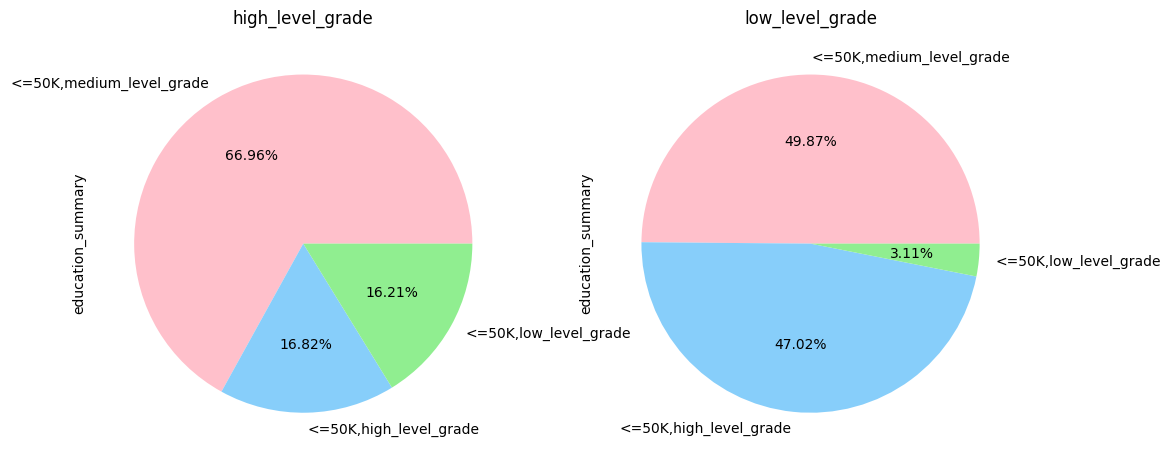

In [557]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,6))
ax1.pie(x=lower_50K,labels=["<=50K,medium_level_grade","<=50K,high_level_grade","<=50K,low_level_grade"],autopct="%.2f%%",colors=["pink","lightskyblue","lightgreen"])
ax1.set_title("high_level_grade")
ax1.set_ylabel("education_summary")
ax2.pie(x=upper_50K,labels=["<=50K,medium_level_grade","<=50K,high_level_grade","<=50K,low_level_grade"],autopct="%.2f%%",colors=["pink","lightskyblue","lightgreen"]);
ax2.set_title("low_level_grade")
ax2.set_ylabel("education_summary")

In [558]:
p = pd.DataFrame(p.rename_axis(columns={'Education_Summary':p}))
p

TypeError: Series.rename_axis() got an unexpected keyword argument 'columns'

In [ ]:
#p.rename(columns={"education_summary":"percentage"},inplace=True)
#p

In [ ]:
p.reset_index(level=[0,1],inplace=True)    # for indexing
p

In [ ]:
p.sort_values(by=["salary","education_summary"])

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(14,6))
ax1.pie(x=sal_lower50K,labels=["medium","high","low"],autopct="%.2f%%",colors=["lightgreen","pink","lightskyblue"],startangle=120)
ax1.set_title("<=50K")
ax2.pie(x=sal_upper50K,labels=["medium","high","low"],autopct="%.2f%%",colors=["pink","lightgreen","lightskyblue"],startangle=0);
ax2.set_title(">50K");

marital_status and relationship

In [559]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary', 'education_summary'],
      dtype='object')

In [560]:
df.marital_status.value_counts(dropna=False)   #no nan values

marital_status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [561]:
df.relationship.value_counts(dropna=False)   #replace nan with unknown

relationship
Husband           13187
Not-in-family      8292
NaN                5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [562]:
df.fillna("Unknown",inplace=True)

In [563]:
df.relationship.value_counts(dropna=False)

relationship
Husband           13187
Not-in-family      8292
Unknown            5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [564]:
df.groupby("relationship")["marital_status"].value_counts()

relationship    marital_status       
Husband         Married-civ-spouse       13178
                Married-AF-spouse            9
Not-in-family   Never-married             4694
                Divorced                  2403
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Married-spouse-absent       32
                Married-AF-spouse            1
Unknown         Never-married             4481
                Divorced                   328
                Separated                   99
                Married-civ-spouse          95
                Married-spouse-absent       45
                Widowe

In [565]:
#visualize count of person in each categories
df.marital_status.unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

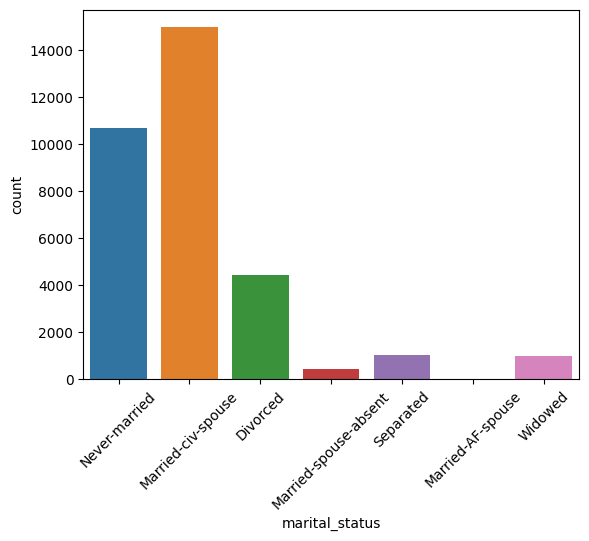

In [566]:
fig,ax = plt.subplots()
sns.countplot(x="marital_status",data=df);
ax.set_xticklabels(df.marital_status.unique(),rotation=45);

In [567]:
#Check the count of person in each "salary" levels by categories and visualize it with countplot
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                32537 non-null  int64 
 1   workclass          32537 non-null  object
 2   fnlwgt             32537 non-null  int64 
 3   education          32537 non-null  object
 4   education_num      32537 non-null  object
 5   marital_status     32537 non-null  object
 6   occupation         32537 non-null  object
 7   relationship       32537 non-null  object
 8   race               32537 non-null  object
 9   sex                32537 non-null  object
 10  capital_gain       32537 non-null  int64 
 11  capital_loss       32537 non-null  int64 
 12  hours_per_week     32537 non-null  int64 
 13  native_country     32537 non-null  object
 14  salary             32537 non-null  object
 15  education_summary  32537 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.2+ MB

In [568]:
#comparing marital_status and salary
df.groupby('marital_status')['salary'].value_counts()

marital_status         salary
Divorced               <=50K      3978
                       >50K        463
Married-AF-spouse      <=50K        13
                       >50K         10
Married-civ-spouse     <=50K      8280
                       >50K       6690
Married-spouse-absent  <=50K       384
                       >50K         34
Never-married          <=50K     10176
                       >50K        491
Separated              <=50K       959
                       >50K         66
Widowed                <=50K       908
                       >50K         85
Name: count, dtype: int64

[Text(0, 0, 'Never-married'),
 Text(1, 0, 'Married-civ-spouse'),
 Text(2, 0, 'Divorced'),
 Text(3, 0, 'Married-spouse-absent'),
 Text(4, 0, 'Separated'),
 Text(5, 0, 'Married-AF-spouse'),
 Text(6, 0, 'Widowed')]

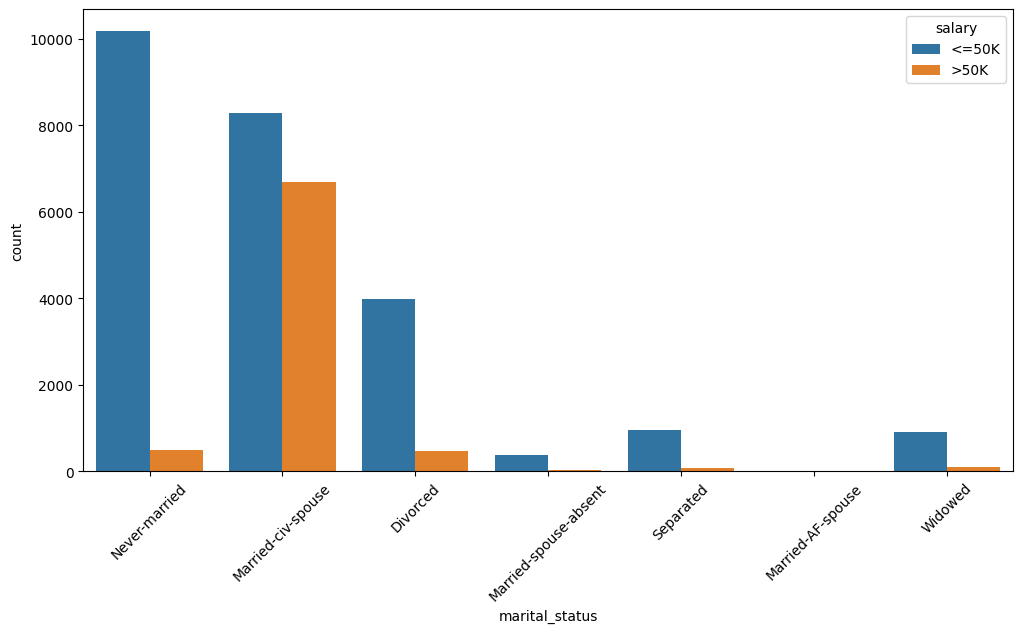

In [570]:
fig,ax = plt.subplots(figsize=(12,6))
sns.countplot(x="marital_status",hue="salary",data=df)
ax.set_xticklabels(df.marital_status.unique(),rotation=45)

In [571]:
# to plot pie chart

#Decrease the number of categories in "marital_status" feature as married, and unmarried 
#and create a new feature with this new categorical data
def mapping_marital_status(x):
    if x in ["Never-married", "Divorced", "Separated", "Widowed"]:
        return "unmarried"
    elif x in ["Married-civ-spouse", "Married-AF-spouse", "Married-spouse-absent"]:
        return "married"

In [572]:
df.marital_status.apply(mapping_marital_status).value_counts()

marital_status
unmarried    17126
married      15411
Name: count, dtype: int64

In [587]:
df["marital_status_summary"] = df.marital_status.apply(mapping_marital_status)
df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary,education_summary,marital_status_summary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,high_level_grade,unmarried
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,high_level_grade,married


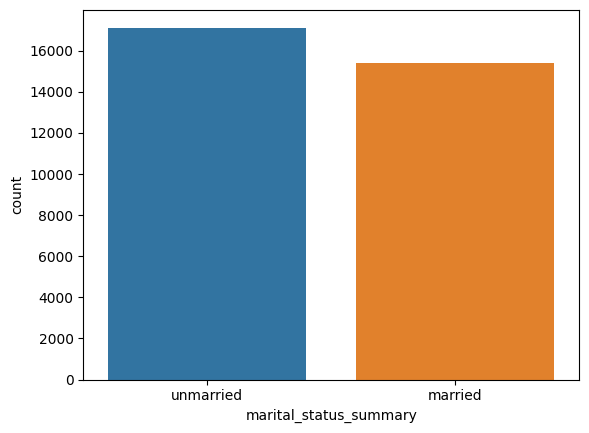

In [588]:
#Visualize the count of person in each categories for these new marital status (married, unmarried)
fig,ax = plt.subplots()
sns.countplot(x="marital_status_summary",data=df);

In [589]:
#Check the count of person in each "salary" levels by these new marital status (married, unmarried) and visualize it with countplot
df.groupby("marital_status_summary")["salary"].value_counts()

marital_status_summary  salary
married                 <=50K      8677
                        >50K       6734
unmarried               <=50K     16021
                        >50K       1105
Name: count, dtype: int64

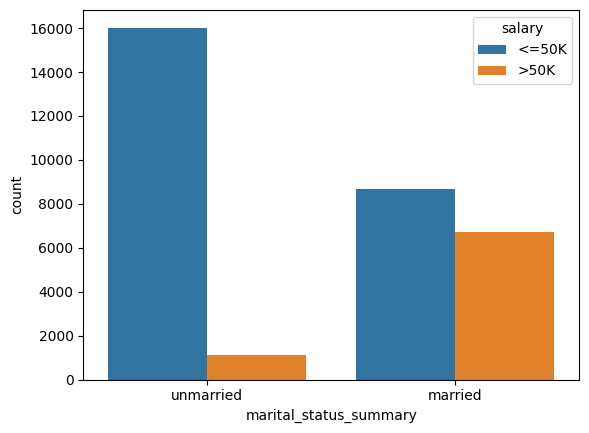

In [590]:
sns.countplot(x="marital_status_summary",data=df,hue="salary");

In [591]:
#pie plot
df.groupby("marital_status_summary")["salary"].value_counts(normalize=True)
#normalize calculates the proportion of each unique value. 

marital_status_summary  salary
married                 <=50K     0.563039
                        >50K      0.436961
unmarried               <=50K     0.935478
                        >50K      0.064522
Name: proportion, dtype: float64

In [592]:
marital_status_table = df.groupby("salary")["marital_status_summary"].value_counts(normalize=True)
marital_status_table

salary  marital_status_summary
<=50K   unmarried                 0.648676
        married                   0.351324
>50K    married                   0.859038
        unmarried                 0.140962
Name: proportion, dtype: float64

In [593]:
marital_status_table =pd.DataFrame(marital_status_table)
marital_status_table

proportion
salary marital_status_summary            
<=50K  unmarried                 0.648676
       married                   0.351324
>50K   married                   0.859038
       unmarried                 0.140962

In [594]:
marital_status_table.rename(columns={"marital_status_summary":"percentage"},inplace=True)
marital_status_table

proportion
salary marital_status_summary            
<=50K  unmarried                 0.648676
       married                   0.351324
>50K   married                   0.859038
       unmarried                 0.140962

In [595]:
marital_status_table.rename(columns={"proportion":"percentage"},inplace=True)
marital_status_table

percentage
salary marital_status_summary            
<=50K  unmarried                 0.648676
       married                   0.351324
>50K   married                   0.859038
       unmarried                 0.140962

In [596]:
marital_status_table.columns

Index(['percentage'], dtype='object')

In [597]:
marital_status_table.reset_index(level=[0,1],inplace=True)

In [598]:
marital_status_table.columns

Index(['salary', 'marital_status_summary', 'percentage'], dtype='object')

In [599]:
marital_status_table.sort_values(by=["salary","marital_status_summary"],inplace=True)
marital_status_table

,salary,marital_status_summary,percentage
1,<=50K,married,0.351324
0,<=50K,unmarried,0.648676
2,>50K,married,0.859038
3,>50K,unmarried,0.140962


In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))
ax1.pie(x=salary

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))
ax1.pie(((df.groupby(df["salary"] == "<=50K")["marital_status_summary"].value_counts(normalize=True))[1]),
          labels=["unmarried", "married"],
          autopct= "%.2f%%",
          colors=["lightskyblue","pink"],
          textprops= {"fontsize":12},
          startangle=120,
          rotatelabels=True
       )
ax1.set_title("<=50K",fontsize=15)
ax1.set_ylabel("marital_status")

ax2.pie(((df.groupby(df["salary"] == ">50K")["marital_status_summary"].value_counts(normalize=True))[1]),
          labels=["married","unmarried"],
          autopct= "%.2f%%",
          colors=["pink","lightskyblue"],
          textprops= {"fontsize":12},
          rotatelabels=True
       )
ax2.set_title(">50K",fontsize=15)
ax2.set_ylabel("marital_status");

In [ ]:
#sex
df['sex'].value_counts()      # categorical

In [ ]:
df.sex.unique()

In [ ]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(x='sex',data=df)

In [ ]:
#compare salary and sex
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(x='sex',data=df,hue='salary')

In [ ]:
df.groupby('sex')['salary'].value_counts()

In [ ]:
percentage=df.groupby('sex')['salary'].value_counts()/df.groupby('sex')['salary'].count()
percentage

In [ ]:
Female = percentage[:2]
print(Female)
Male = percentage[2:]
print(Male)

In [ ]:
fig , (plot1,plot2) = plt.subplots(ncols=2,figsize=(8,6))

plot1.pie(Female,labels=['<=50K','>50K'],autopct='%.1f%%',shadow=True,explode=[0,0.1])
plot1.set_title('Female',fontsize=10)
plot1.set_ylabel('salary')

plot2.pie(Male,labels=['<=50K','>50K'],autopct='%.1f%%',shadow=True,explode=[0,0.1])
plot2.set_title('Male')
plot2.set_ylabel('salary')

In [ ]:
'''
Conclusion:
The percentage of male is more who earns >50K than female
'''

In [ ]:
#marital_status
df['marital_status'].value_counts()      #categorical

In [ ]:
df.marital_status.unique()

In [ ]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(x='marital_status',data=df)
ax.set_xticklabels(df.marital_status.unique(),rotation=90);

In [ ]:
#compare salary and marital status
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(x='marital_status',data=df,hue='salary')
ax.set_xticklabels(df.marital_status.unique(),rotation=90);

In [ ]:
def marital_arranging(x):
    if x in ['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse']:
        return 'Married'
    if x in ['Divorced','Separated','Widowed']:
        return 'Divorced'
    if x in ['Never-married']:
        return 'Never Married'

In [ ]:
df['Marital_Status']=df.marital_status.apply(marital_arranging)

In [ ]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(x='Marital_Status',data=df)
ax.set_xticklabels(df.Marital_Status.unique(),rotation=90);

In [ ]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(x='Marital_Status',data=df,hue='salary')
ax.set_xticklabels(df.Marital_Status.unique(),rotation=90);

In [ ]:
df.Marital_Status.value_counts()

In [ ]:
df.groupby('Marital_Status')['salary'].value_counts()

In [ ]:
marital_per=df.groupby('Marital_Status')['salary'].value_counts()/df.groupby('Marital_Status')['salary'].count()
marital_per

In [ ]:
Divorced = marital_per[:2]
Divorced

In [ ]:
Married = marital_per[2:4]
Married

In [ ]:
Never_Married = marital_per[4:]
Never_Married

In [ ]:
fig,(plot1,plot2,plot3)=plt.subplots(ncols=3,figsize=(10,6));

plot1.pie(Married,autopct='%.1f%%',labels=['<=50K','>50K'],explode=[0,0.1],shadow=True,colors=(['yellow','red']))
plot1.set_title('Married')
plot1.set_ylabel('salary')

plot2.pie(Divorced,autopct='%.1f%%',labels=['<=50K','>50K'],explode=[0,0.1],shadow=True,colors=(['yellow','red']))
plot2.set_title('Divorced')
plot2.set_ylabel('salary')

plot3.pie(Never_Married,autopct='%.1f%%',labels=['<=50K','>50K'],explode=[0,0.1],shadow=True,colors=(['yellow','red']))
plot3.set_title('Never_Married')
plot3.set_ylabel('salary');

In [ ]:
# race
df['race'].value_counts()   #categorical

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
ax=sns.countplot(x='race',data=df)

for i in ax.patches:
    ax.annotate((i.get_height()),(i.get_x()+0.3,i.get_height()+15),fontsize=20)

In [ ]:
percentage=df['race'].value_counts()/len(df)*100
percentage

In [ ]:
plt.pie(percentage,labels=['White','Black','Asian-Pac-Islander','Amer-Indian-Eskimo','Other'],autopct='%.1f%%',explode=[0,0.1,0.1,0.2,0.2],shadow=True)
plt.title("Pie chart of race",fontsize=20)

In [ ]:
#relationship
df['relationship'].value_counts()     #categorical

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
ax=sns.countplot(x='relationship',data=df)
for i in ax.patches:
    ax.annotate((i.get_height()),(i.get_x()+0.3,i.get_height()+10),fontsize=10)

In [ ]:
percentage=df['relationship'].value_counts()/len(df)*100
percentage

In [ ]:
plt.pie(percentage,labels=['Husband','Not-in-family','Unmarried','Wife','Other-relative'],autopct='%.1f%%',explode=[0,0.1,0.1,0.2,0.2],shadow=True)
plt.title("Pie chart of relationship",fontsize=10)

In [ ]:
#workclass
df['workclass'].value_counts()      #categorical

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
ax=sns.countplot(x='workclass',data=df)
for i in ax.patches:
    ax.annotate((i.get_height()),(i.get_x()+0.3,i.get_height()+10),fontsize=10)

In [ ]:
p=df['workclass'].value_counts()/len(df)*100
p

In [ ]:
plt.pie(p)

In [ ]:
plt.pie(p,labels=['Private','Self-emp-not-inc','Local-gov','State-gov','Self-emp-inc','Federal-gov','Without-pay'],
        autopct='%.1f%%',explode=[0,0,0.1,0.1,0.1,0.2,0.2],shadow=True)
plt.title("Pie chart of workclass",fontsize=10)


In [ ]:
df.workclass.value_counts()/len(df)*100

In [ ]:
#occupation
df['occupation'].value_counts()   #categorical

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25,10))
ax=sns.countplot(x='occupation',data=df)
for i in ax.patches:
    ax.annotate((i.get_height()),(i.get_x()+0.3,i.get_height()+10),fontsize=10)

In [ ]:
p=df['occupation'].value_counts()/len(df)*100
p

In [ ]:
plt.pie(p,labels=['Exec-managerial','Prof-specialty','Craft-repair','Adm-clerical','Sales','Other-service','Machine-op-inspct','Transport-moving',
                 'Handlers-cleaners','Farming-fishing','Tech-support','Protective-serv','Priv-house-serv','Armed-Forces'],
        autopct='%.1f%%',explode=[0.1 for i in range(len(p))],shadow=True)
plt.title("Pie chart of workclass",fontsize=10)